# Homework 2

**Name:Chengjun Liu**

## 1. Did you review up to and including lecture 5 and tutorial 5? If you haven’t, please do so first. This homework, like every other homework, only covers a small part of the course contents.


Yes, I have reviewed the corresponding content.

## You have four balls in a box: red, black, blue and yellow. Write python code to sample with replacement from this box. Suppose each ball has an equal chance of getting selected. Start with np.random.seed(2) and get three samples of size 5. (You can modify the code in Lecture 5).


In [1]:
import numpy as np
np.random.seed(2)

color=['red','black','blue','yellow']
prob=[0.25,0.25,0.25,0.25]

sample1=np.random.choice(color,p=prob,size=5)
sample2=np.random.choice(color,p=prob,size=5)
sample3=np.random.choice(color,p=prob,size=5)

print(sample1)
print(sample2)
print(sample3)

['black' 'red' 'blue' 'black' 'black']
['black' 'red' 'blue' 'black' 'black']
['blue' 'blue' 'red' 'blue' 'red']


## Suppose random variables X1, . . . , Xn are independent and identicially distributed (i.i.d.) N(0, 1). What are the mean and variance of X¯ = (X1 + . . . Xn)/n? You need to show the steps to get the conclusion

$\begin{align}
E(\overline{X})&=E(\frac{X_1+X_2+...+X_n}{n})\\
&=\frac{E(X_1+X_2+...+X_n)}{n}\\
&=\frac{E(X_1)+E(X_2)+...+E(X_n)}{n}\\
&=\frac{0+0+...+0}{n}\\
&=0
\end{align}$

$\begin{align}
Var(\overline{X})&=Var(\frac{X_1+X_2+...+X_n}{n})\\
&=\frac{Var(X_1+X_2+...+X_n)}{n^2}\\
&=\frac{Var(X_1)+Var(X_2)+...+Var(X_n)}{n^2}\\
&=\frac{1+1+...+1}{n^2}\\
&=\frac{1}{n}
\end{align}$


## Use the smarket data that appears in Tutorial 3 and Tutorial 4. Create the Up variable as the response (same as in the tutorials). Then train a logistic regression model using Lag3 and Lag4 as the predictors, with the observations in years 2002-2003 the training data. What are the coefficient estimates of this fitted model?

In [14]:
import pandas as pd

smarket=pd.read_csv('smarket.csv')
smarket['Up']=np.where(smarket['Direction']=='Up',1,0)
smarket_sub=smarket[smarket['Year'].isin([2002,2003])]

In [16]:
import statsmodels.formula.api as smf
result=smf.logit('Up~Lag3+Lag4',data=smarket_sub).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.692111
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                  504
Model:                          Logit   Df Residuals:                      501
Method:                           MLE   Df Model:                            2
Date:                Tue, 31 Mar 2020   Pseudo R-squ.:                0.001450
Time:                        13:42:16   Log-Likelihood:                -348.82
converged:                       True   LL-Null:                       -349.33
Covariance Type:            nonrobust   LLR p-value:                    0.6026
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0159      0.089     -0.179      0.858      -0.191       0.159
Lag3           0.0347      0.064      0.538      0.591      -0.092       0.161
Lag4           0.0567      0.065      0.878      0.380      -0.070       0.183
==============================================================================
"""

Coefficient estimate of Intercept, Lag3, Lag4 are -0.0159, 0.0347, 0.0567.

## Use the model you fitted in problem 4 to predict the response for the year 2004. Plot the ROC curve and calculate the AUC.


In [31]:
smarket_04=smarket[smarket['Year']==2004]
result_prob=result.predict(smarket_04[['Lag3','Lag4']])
result_pred=result_prob>0.5

In [33]:
print(result_prob,'\n')
print(result_pred)

746    0.509163
747    0.513707
748    0.497993
749    0.496242
750    0.502391
         ...   
993    0.504394
994    0.511791
995    0.501262
996    0.492931
997    0.496109
Length: 252, dtype: float64 

746     True
747     True
748    False
749    False
750     True
       ...  
993     True
994     True
995     True
996    False
997    False
Length: 252, dtype: bool


In [34]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,threshold=roc_curve(smarket_04['Up'],result_prob)
roc_auc=auc(fpr,tpr)
print('The AUC is ', roc_auc)

The AUC is  0.44088010204081635


<Figure size 432x288 with 0 Axes>

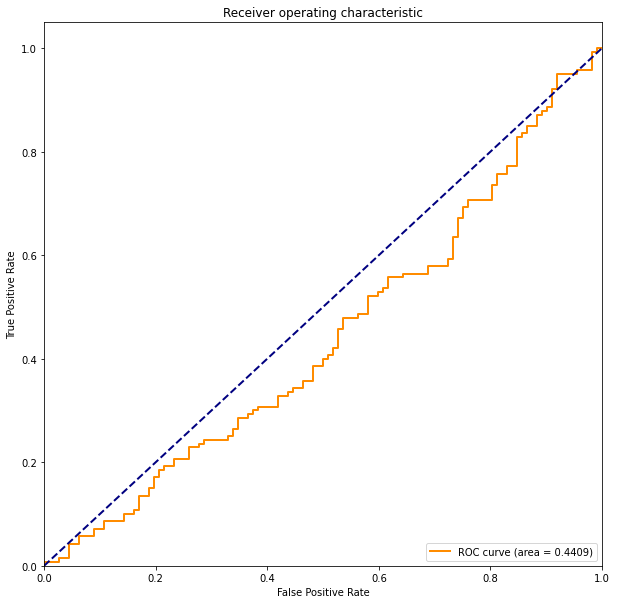

In [36]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
lw=2, label='ROC curve (area = {0:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # lw is linewidth
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()